<a href="https://colab.research.google.com/github/hygo2025/ciencia_de_dados/blob/main/trabalho_pratico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
# !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1AeYgV89TmYvNC__RDXr8hS0P6WOsChWg' -O filmes.csv

In [92]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install nltk
# !pip install numpy
# !pip install scikit-learn
# !pip install plotly

In [93]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to /home/hygo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:
imdb_reviews = pd.read_csv("filmes.csv").groupby('genres', group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42))

imdb_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3031 entries, 7431 to 1416
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   genres           3031 non-null   object 
 1   averageRating    3031 non-null   float64
 2   numVotes         3031 non-null   int64  
 3   sinopse          3031 non-null   object 
 4   primaryTitle     3031 non-null   object 
 5   startYear        3031 non-null   int64  
 6   runtimeMinutes   3031 non-null   object 
 7   actors_names     3031 non-null   object 
 8   directors_names  3031 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 236.8+ KB


In [95]:
imdb_reviews.head()

,genres,averageRating,numVotes,sinopse,primaryTitle,startYear,runtimeMinutes,actors_names,directors_names
7431,Action,6.0,4431,Four guys set off on a world tour to enact the...,Dirty Sanchez: The Movie,2006,94,['Howard Marks'],['Jim Hickey']
27336,Action,4.2,577,A man unravels the mysteries of his past and h...,Silambattam,2008,166,['Silambarasan TR' 'Silambarasan TR' 'Prabhu' ...,['S. Saravanan']
4385,Action,5.1,37650,A government agent trains Cody Banks in the wa...,Agent Cody Banks,2003,102,['Frankie Muniz' 'Andrew Francis' 'Keith David...,['Harald Zwart']
1982,Action,7.5,38062,The story of the 1941 Japanese air raid on Pea...,Tora! Tora! Tora!,1970,144,['Martin Balsam' 'Sô Yamamura' 'Jason Robards'...,['Richard Fleischer' 'Kinji Fukasaku' 'Toshio ...
22746,Action,6.1,21505,A mysterious stranger and a random act of viol...,In a Valley of Violence,2016,104,['Ethan Hawke' 'John Travolta' 'James Ransone'...,['Ti West']


In [96]:
imdb_txt = imdb_reviews.sinopse

In [97]:
imdb_txt.head()

7431     Four guys set off on a world tour to enact the...
27336    A man unravels the mysteries of his past and h...
4385     A government agent trains Cody Banks in the wa...
1982     The story of the 1941 Japanese air raid on Pea...
22746    A mysterious stranger and a random act of viol...
Name: sinopse, dtype: object

In [98]:
imdb_txt = imdb_txt.str.lower()

In [99]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_english = set(stopwords.words('english'))

In [100]:
imdb_txt = imdb_txt.apply(word_tokenize)

In [101]:
imdb_txt = imdb_txt.apply(lambda x: [w for w in x if w not in stop_english])

In [102]:
imdb_txt.head()

7431     [four, guys, set, world, tour, enact, seven, d...
27336    [man, unravels, mysteries, past, upbringing, s...
4385     [government, agent, trains, cody, banks, ways,...
1982     [story, 1941, japanese, air, raid, pearl, harb...
22746    [mysterious, stranger, random, act, violence, ...
Name: sinopse, dtype: object

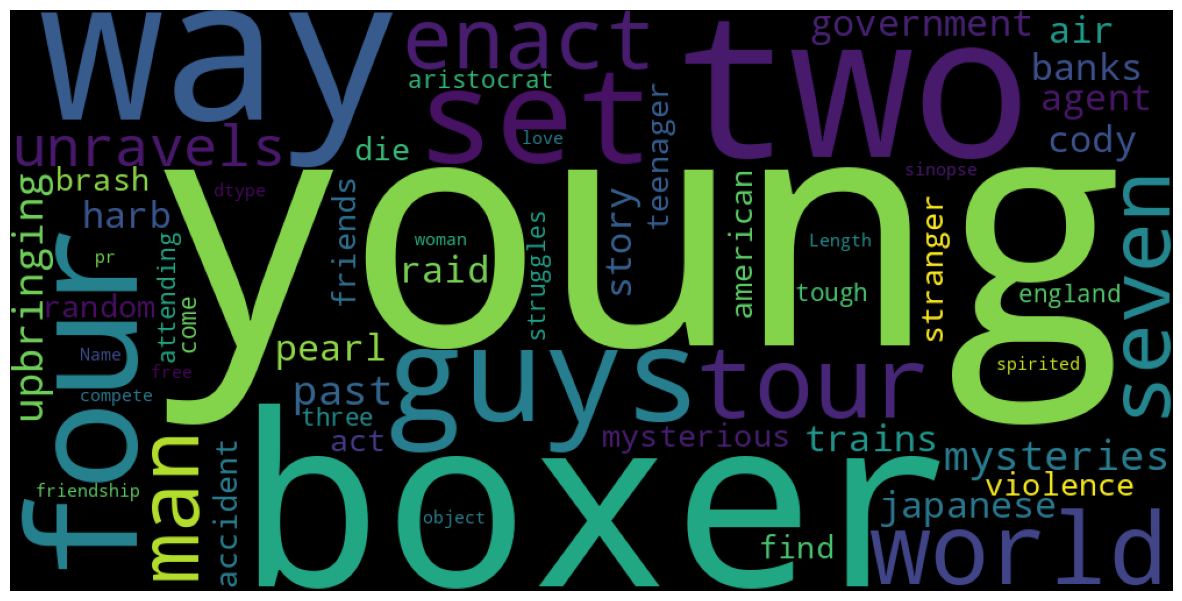

In [103]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1000, height = 500, stopwords = stop_english).generate(str(imdb_txt))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [104]:
from nltk.probability import FreqDist
from nltk import flatten

In [105]:
imdb_words = imdb_txt.to_list()

In [106]:
imdb_words = flatten(imdb_words)

In [107]:
imdb_words

['four',
 'guys',
 'set',
 'world',
 'tour',
 'enact',
 'seven',
 'deadly',
 'sins',
 '.',
 'based',
 'mtv',
 'europe',
 'series',
 '``',
 'dirty',
 'sanchez',
 "''",
 '.',
 'man',
 'unravels',
 'mysteries',
 'past',
 'upbringing',
 'settling',
 'village',
 'feud',
 '.',
 'government',
 'agent',
 'trains',
 'cody',
 'banks',
 'ways',
 'covert',
 'operations',
 'require',
 'younger',
 'participants',
 '.',
 'story',
 '1941',
 'japanese',
 'air',
 'raid',
 'pearl',
 'harbor',
 ',',
 'series',
 'preceding',
 'american',
 'blunders',
 'aggravated',
 'effectiveness',
 '.',
 'mysterious',
 'stranger',
 'random',
 'act',
 'violence',
 'drag',
 'town',
 'misfits',
 'nitwits',
 'bloody',
 'crosshairs',
 'revenge',
 '.',
 'couple',
 'guys',
 'small',
 'town',
 'montenegro',
 'come',
 'big',
 'city',
 ',',
 'plan',
 'leave',
 'mark',
 'new',
 'environment',
 'winning',
 'street',
 'fights',
 'keep',
 'chivalry',
 'brought',
 'back',
 'home',
 '.',
 'one',
 '(',
 'dragomir',
 'stojanovic',
 ')',
 

In [108]:
imdb_words =  [w for w in imdb_words if len(w) > 2]

In [109]:
imdb_words = [w for w in imdb_words if not w in ['...','u.s.']]

In [110]:
imdb_freq = FreqDist(imdb_words)

In [111]:
imdb_freq.most_common(100)

[('young', 400),
 ('man', 309),
 ('love', 299),
 ('two', 291),
 ('life', 277),
 ('one', 261),
 ('woman', 254),
 ('new', 237),
 ('family', 226),
 ('find', 195),
 ('world', 185),
 ('story', 172),
 ('must', 161),
 ('girl', 158),
 ('years', 148),
 ('get', 141),
 ('friends', 139),
 ('group', 138),
 ('father', 134),
 ('finds', 128),
 ('becomes', 128),
 ('wife', 128),
 ('police', 127),
 ('back', 123),
 ('war', 123),
 ('falls', 121),
 ('school', 115),
 ('time', 113),
 ('daughter', 112),
 ('three', 111),
 ('gets', 110),
 ('home', 109),
 ('help', 108),
 ('murder', 107),
 ("n't", 106),
 ('take', 105),
 ('takes', 105),
 ('town', 104),
 ('mother', 102),
 ('old', 98),
 ('former', 97),
 ('son', 97),
 ('lives', 96),
 ('killer', 94),
 ('people', 93),
 ('boy', 93),
 ('city', 92),
 ('gang', 91),
 ('death', 90),
 ('become', 90),
 ('soon', 90),
 ('american', 89),
 ('night', 88),
 ('goes', 88),
 ('friend', 88),
 ('tries', 86),
 ('first', 86),
 ('small', 83),
 ('way', 83),
 ('film', 83),
 ('house', 82),
 ('h

In [112]:
imdb_txt = imdb_reviews.sinopse

imdb_txt

7431     Four guys set off on a world tour to enact the...
27336    A man unravels the mysteries of his past and h...
4385     A government agent trains Cody Banks in the wa...
1982     The story of the 1941 Japanese air raid on Pea...
22746    A mysterious stranger and a random act of viol...
                               ...                        
23761    After a teenager's friends die in an accident,...
14664    A brash young American aristocrat attending Ox...
9524     A tough young boxer struggles to come out in E...
2804     A three-way friendship between two free-spirit...
1416           Two boxers compete for the love of a woman.
Name: sinopse, Length: 3031, dtype: object

In [113]:
imdb_txt = pd.DataFrame(imdb_txt, columns = ['sinopse'])

imdb_txt.head()

,sinopse
7431,Four guys set off on a world tour to enact the...
27336,A man unravels the mysteries of his past and h...
4385,A government agent trains Cody Banks in the wa...
1982,The story of the 1941 Japanese air raid on Pea...
22746,A mysterious stranger and a random act of viol...


In [114]:
imdb_txt

,sinopse
7431,Four guys set off on a world tour to enact the...
27336,A man unravels the mysteries of his past and h...
4385,A government agent trains Cody Banks in the wa...
1982,The story of the 1941 Japanese air raid on Pea...
22746,A mysterious stranger and a random act of viol...
...,...
23761,"After a teenager's friends die in an accident,..."
14664,A brash young American aristocrat attending Ox...
9524,A tough young boxer struggles to come out in E...
2804,A three-way friendship between two free-spirit...


In [115]:
imdb_txt.sinopse = imdb_txt.sinopse.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_english)]))

In [116]:
imdb_txt.sinopse = imdb_txt.sinopse.apply(lambda x: ' '.join([word for word in x.split() if len(word)>2]))

In [117]:
from sklearn.feature_extraction.text import CountVectorizer
DTM = CountVectorizer(max_features=100, ngram_range=(1,3))

In [118]:
X_DTM = DTM.fit_transform(imdb_txt.sinopse)
X_DTM

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 11403 stored elements and shape (3031, 100)>

In [119]:
X_DTM = pd.DataFrame(X_DTM.toarray(), columns = DTM.vocabulary_)
X_DTM

,set,world,man,past,the,story,american,mysterious,town,couple,...,boy,women,husband,gets,daughter,killer,year old,decides,falls love,house
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3027,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3029,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
numcols = imdb_reviews[['genres']]

In [121]:
numcols

,genres
7431,Action
27336,Action
4385,Action
1982,Action
22746,Action
...,...
23761,"Sport,Romance"
14664,"Sport,Romance"
9524,"Sport,Romance"
2804,"Sport,Romance"


In [122]:
X = X_DTM

In [123]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

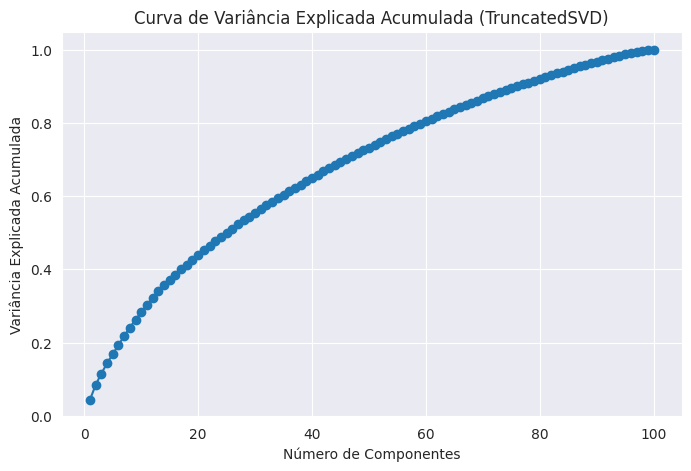

Número de componentes para atingir 90% da variância explicada: 77


In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Suponha que X seja sua matriz TF-IDF (esparsa)

# Definindo o intervalo de valores para testar
componentes_teste = range(1, 101)  # Testa de 1 até 100 componentes
variancia_acumulada = []

# Calculando a variância explicada acumulada para cada número de componentes
for n in componentes_teste:
    svd = TruncatedSVD(n_components=n, random_state=42)
    svd.fit(X)
    variancia_acumulada.append(np.sum(svd.explained_variance_ratio_))

# Plotando a curva de variância explicada acumulada
plt.figure(figsize=(8, 5))
plt.plot(componentes_teste, variancia_acumulada, marker='o')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Curva de Variância Explicada Acumulada (TruncatedSVD)')
plt.grid(True)
plt.show()

# Exemplo: Encontrar o menor número de componentes para atingir 90% da variância explicada
threshold = 0.90  # Define o limite de variância explicada desejada (90%)
n_componentes_adequado = next(n for n, var in zip(componentes_teste, variancia_acumulada) if var >= threshold)
print(f"Número de componentes para atingir {threshold*100:.0f}% da variância explicada: {n_componentes_adequado}")


Silhouette Score para k=2: 0.1490
Silhouette Score para k=3: 0.0751
Silhouette Score para k=4: 0.0862
Silhouette Score para k=5: 0.0893
Silhouette Score para k=6: 0.0881
Silhouette Score para k=7: 0.0850
Silhouette Score para k=8: 0.0718
Silhouette Score para k=9: 0.0751
Silhouette Score para k=10: 0.0737
Silhouette Score para k=11: 0.0737
Silhouette Score para k=12: 0.0769
Silhouette Score para k=13: 0.0735
Silhouette Score para k=14: 0.0770
Silhouette Score para k=15: 0.0795
Silhouette Score para k=16: 0.0757
Silhouette Score para k=17: 0.0788
Silhouette Score para k=18: 0.0663
Silhouette Score para k=19: 0.0685
Silhouette Score para k=20: 0.0692
Silhouette Score para k=21: 0.0807
Silhouette Score para k=22: 0.0789
Silhouette Score para k=23: 0.0804
Silhouette Score para k=24: 0.0757
Silhouette Score para k=25: 0.0713
Silhouette Score para k=26: 0.0781
Silhouette Score para k=27: 0.0791
Silhouette Score para k=28: 0.0805
Silhouette Score para k=29: 0.0802
Silhouette Score para k=30: 

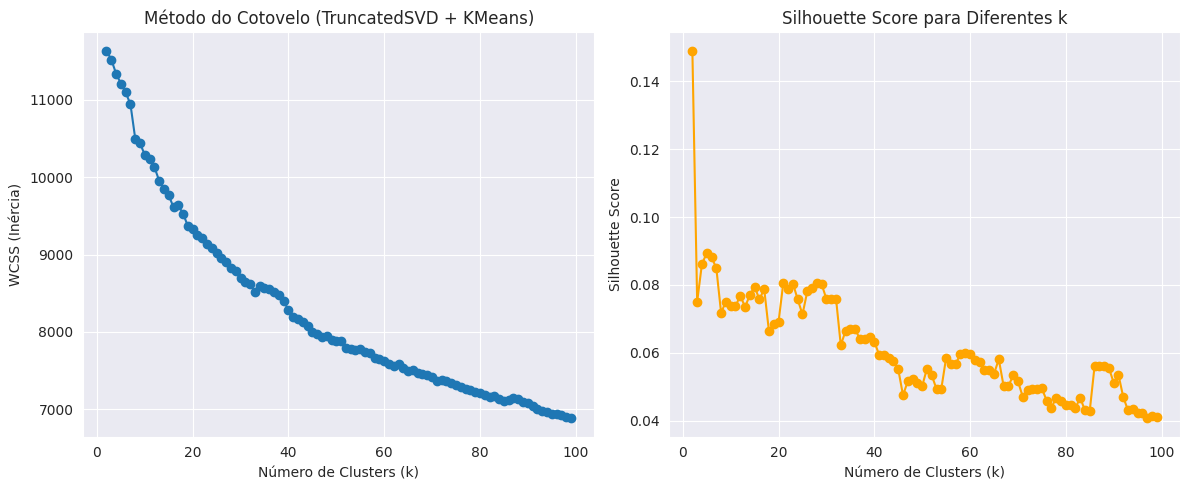

In [129]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Supondo que X seja sua matriz TF-IDF (geralmente esparsa)
# Defina um número de componentes adequado (por exemplo, 50)
n_components = 77
svd = TruncatedSVD(n_components=n_components, random_state=42)
X_reduced = svd.fit_transform(X)

# Listas para armazenar as métricas
wcss_list = []
silhouette_scores = []
range_l = range(2, 100)
# Testando diferentes valores de clusters (k de 2 a 19)
for i in range_l:
    kmeans = KMeans(n_clusters=i, random_state=42)
    clusters = kmeans.fit_predict(X_reduced)  # Utilizando os dados reduzidos
    wcss_list.append(kmeans.inertia_)
    score = silhouette_score(X_reduced, clusters)
    silhouette_scores.append(score)
    print(f"Silhouette Score para k={i}: {score:.4f}")

# Opcional: plotar os resultados para visualizar o "cotovelo" e o Silhouette Score
plt.figure(figsize=(12, 5))

# Gráfico do método do cotovelo (WCSS)
plt.subplot(1, 2, 1)
plt.plot(range_l, wcss_list, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS (Inércia)')
plt.title('Método do Cotovelo (TruncatedSVD + KMeans)')
plt.grid(True)

# Gráfico do Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range_l, silhouette_scores, marker='o', color='orange')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para Diferentes k')
plt.grid(True)

plt.tight_layout()
plt.show()


In [130]:
wcss_list=[]
silhouette_scores = []
for i in range(2,40):
    kmeans = KMeans(n_clusters = i, random_state=42)
    clusters = kmeans.fit_predict(X)
    wcss_list.append(kmeans.inertia_)
    score = silhouette_score(X, clusters)
    silhouette_scores.append(score)
    print(f"Silhouette Score para k={i}: {score:.4f}")

Silhouette Score para k=2: 0.4686
Silhouette Score para k=3: 0.0511
Silhouette Score para k=4: 0.0403
Silhouette Score para k=5: 0.0529
Silhouette Score para k=6: 0.0521
Silhouette Score para k=7: 0.0577
Silhouette Score para k=8: 0.0574
Silhouette Score para k=9: 0.0591
Silhouette Score para k=10: 0.0586
Silhouette Score para k=11: 0.0783
Silhouette Score para k=12: 0.0635
Silhouette Score para k=13: 0.0648
Silhouette Score para k=14: 0.0609
Silhouette Score para k=15: 0.0608
Silhouette Score para k=16: 0.0612
Silhouette Score para k=17: 0.0586
Silhouette Score para k=18: 0.0590
Silhouette Score para k=19: 0.0592
Silhouette Score para k=20: 0.0596
Silhouette Score para k=21: 0.0580
Silhouette Score para k=22: 0.0584
Silhouette Score para k=23: 0.0528
Silhouette Score para k=24: 0.0512
Silhouette Score para k=25: 0.0521
Silhouette Score para k=26: 0.0530
Silhouette Score para k=27: 0.0521
Silhouette Score para k=28: 0.0527
Silhouette Score para k=29: 0.0530
Silhouette Score para k=30: 

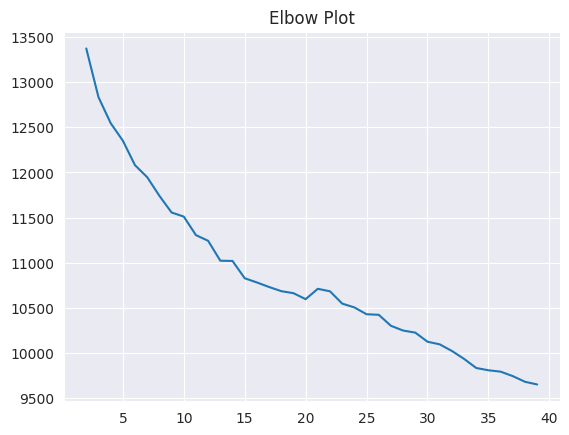

In [132]:
plt.plot(range(2,40),wcss_list)
plt.title('Elbow Plot')
plt.show()

In [134]:
clust2 = KMeans(n_clusters = 40)
clust2model = clust2.fit(X)

In [135]:
silhouette_score(X,clust2model.labels_)

np.float64(0.049001324092075194)

In [136]:
plt.scatter(x = numcols['genres'], c = clust2model.labels_, cmap = 'plasma')

TypeError: scatter() missing 1 required positional argument: 'y'